In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\admin\Downloads\KPI_Exp.csv')

In [3]:
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,PDC,gap%,Day,Profit
0,0,2019-02-15,10780.25,10785.75,10620.40,10724.40,521876968,NaN,NaN,Friday,NaN
1,1,2019-02-18,10738.65,10759.90,10628.40,10640.95,345440240,10724.40,0.132875,Monday,26810.0
2,2,2019-02-19,10636.70,10722.85,10585.65,10604.35,291507060,10640.95,-0.039940,Tuesday,7990.0
3,3,2019-02-20,10655.45,10752.70,10646.40,10735.45,289195306,10604.35,0.481878,Wednesday,-28320.0
4,4,2019-02-21,10744.10,10808.85,10721.50,10789.85,279584955,10735.45,0.080574,Thursday,52385.0


In [4]:
df = df.drop(['Unnamed: 0'],axis=1)

In [5]:
df

,Date,Open,High,Low,Close,Volume,PDC,gap%,Day,Profit
0,2019-02-15,10780.25,10785.75,10620.40,10724.40,521876968,NaN,NaN,Friday,NaN
1,2019-02-18,10738.65,10759.90,10628.40,10640.95,345440240,10724.40,0.132875,Monday,26810.0
2,2019-02-19,10636.70,10722.85,10585.65,10604.35,291507060,10640.95,-0.039940,Tuesday,7990.0
3,2019-02-20,10655.45,10752.70,10646.40,10735.45,289195306,10604.35,0.481878,Wednesday,-28320.0
4,2019-02-21,10744.10,10808.85,10721.50,10789.85,279584955,10735.45,0.080574,Thursday,52385.0
...,...,...,...,...,...,...,...,...,...,...
790,2022-04-28,17189.50,17322.50,17071.05,17245.05,312914417,17038.40,0.886820,Thursday,-20875.0
791,2022-04-29,17329.25,17377.65,17053.25,17102.55,336243642,17245.05,0.488256,Friday,NaN
792,2022-05-02,16924.45,17092.25,16917.25,17069.10,278155513,17102.55,-1.041365,Monday,-13385.0
793,2022-05-04,17096.60,17132.85,16623.95,16677.60,310632799,17069.10,0.161110,Wednesday,74905.0


In [6]:
df['Profit']= df['Profit'].fillna(0)
df['gap%']=df['gap%'].fillna(0)
df['PDC']=df['PDC'].fillna(0)
df = df.drop(['Date'],axis=1)

In [7]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['Day'] = lb.fit_transform(df['Day'])

In [8]:
df

,Open,High,Low,Close,Volume,PDC,gap%,Day,Profit
0,10780.25,10785.75,10620.40,10724.40,521876968,0.00,0.000000,0,0.0
1,10738.65,10759.90,10628.40,10640.95,345440240,10724.40,0.132875,1,26810.0
2,10636.70,10722.85,10585.65,10604.35,291507060,10640.95,-0.039940,5,7990.0
3,10655.45,10752.70,10646.40,10735.45,289195306,10604.35,0.481878,6,-28320.0
4,10744.10,10808.85,10721.50,10789.85,279584955,10735.45,0.080574,4,52385.0
...,...,...,...,...,...,...,...,...,...
790,17189.50,17322.50,17071.05,17245.05,312914417,17038.40,0.886820,4,-20875.0
791,17329.25,17377.65,17053.25,17102.55,336243642,17245.05,0.488256,0,0.0
792,16924.45,17092.25,16917.25,17069.10,278155513,17102.55,-1.041365,1,-13385.0
793,17096.60,17132.85,16623.95,16677.60,310632799,17069.10,0.161110,6,74905.0


In [9]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Open      4.455750e+03
High      4.461725e+03
Low       4.452525e+03
Close     4.471750e+03
Volume    2.965249e+08
PDC       4.471050e+03
gap%      5.696719e-01
Day       4.000000e+00
Profit    3.159500e+04
dtype: float64


In [10]:
df.describe(include='all').round(0)

,Open,High,Low,Close,Volume,PDC,gap%,Day,Profit
count,795.0,795.0,795.0,795.0,7.950000e+02,795.0,795.0,795.0,795.0
mean,13429.0,13503.0,13325.0,13416.0,5.088505e+08,13396.0,0.0,3.0,15646.0
std,2737.0,2737.0,2730.0,2736.0,2.183694e+08,2775.0,1.0,2.0,35568.0
min,7735.0,8037.0,7511.0,7610.0,4.852086e+07,0.0,-9.0,0.0,-104715.0
25%,11374.0,11419.0,11295.0,11345.0,3.352225e+08,11342.0,-0.0,1.0,0.0
50%,12151.0,12183.0,12094.0,12127.0,4.924753e+08,12126.0,0.0,4.0,6580.0
75%,15829.0,15881.0,15747.0,15816.0,6.317474e+08,15814.0,0.0,5.0,31595.0
max,18602.0,18604.0,18445.0,18477.0,1.811564e+09,18477.0,4.0,6.0,328970.0


In [19]:
print((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))

      Open   High    Low  Close  Volume    PDC   gap%    Day  Profit
0    False  False  False  False   False   True  False  False   False
1    False  False  False  False   False  False  False  False   False
2    False  False  False  False   False  False  False  False   False
3    False  False  False  False   False  False  False  False   False
4    False  False  False  False   False  False  False  False   False
..     ...    ...    ...    ...     ...    ...    ...    ...     ...
790  False  False  False  False   False  False  False  False   False
791  False  False  False  False   False  False  False  False   False
792  False  False  False  False   False  False   True  False   False
793  False  False  False  False   False  False  False  False   False
794  False  False  False  False   False  False  False  False   False

[795 rows x 9 columns]


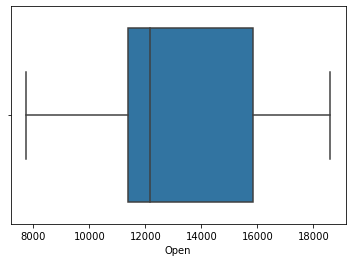

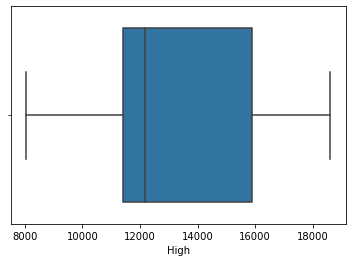

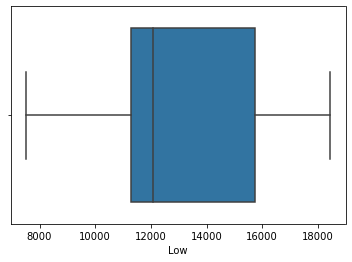

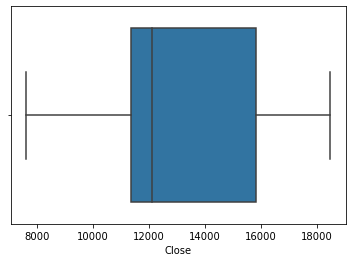

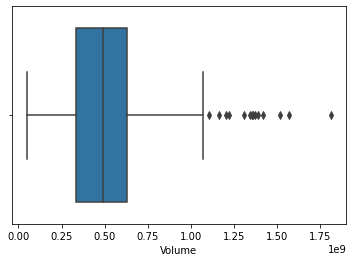

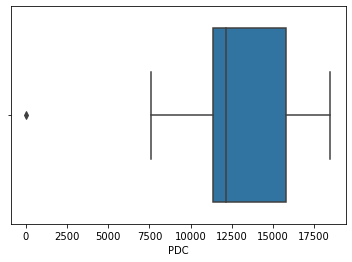

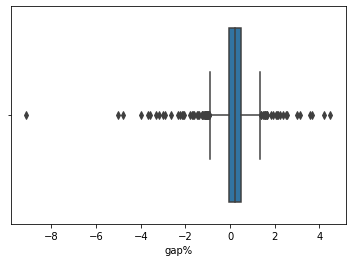

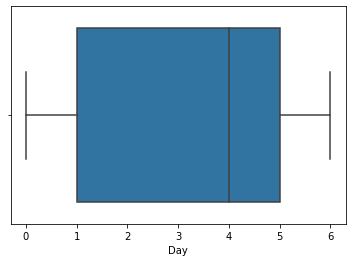

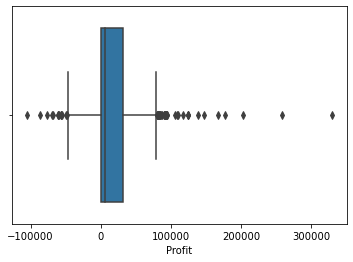

In [20]:
for i in df:
    sns.boxplot(df[i])
    plt.show()

In [21]:
x=df.drop(['Profit'],axis=1)
y=df['Profit']


In [22]:
y.head()

0        0.0
1    26810.0
2     7990.0
3   -28320.0
4    52385.0
Name: Profit, dtype: float64

Converting days into numerical format


In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=400)

In [24]:
(x_train.shape),(x_test.shape)

((596, 8), (199, 8))

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [26]:
from sklearn.metrics import r2_score,accuracy_score

In [27]:
from math import sqrt

In [28]:
r2_score(y_test,model.predict(x_test))

-0.09116714334153264

In [29]:
r2_score(y_train,model.predict(x_train))

0.14597912505234045

In [30]:
from xgboost import XGBRegressor

In [31]:
model = XGBRegressor()

In [32]:
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [33]:
r2_score(y_test,model.predict(x_test))

-0.3020012736903981

In [34]:
r2_score(y_train,model.predict(x_train))

0.9979065250047748

<AxesSubplot:xlabel='Profit'>

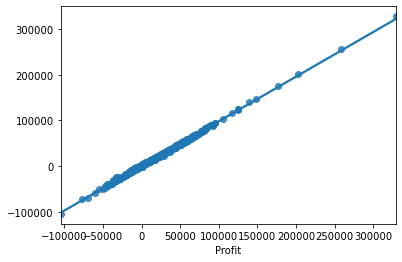

In [35]:
sns.regplot(y_train,model.predict(x_train))

<AxesSubplot:xlabel='Profit'>

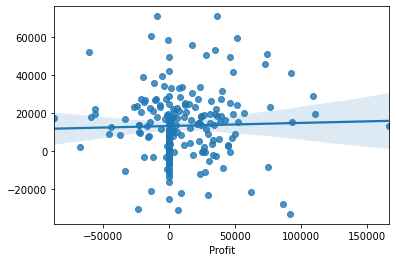

In [36]:
sns.regplot(y_test,model.predict(x_test))  

In [ ]:
what is the timing for next project
ans = 10 pm
